##Import Library

In [ ]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


##Load Dataset

In [ ]:
def loadDataset():
    data = load_digits()
    feature = data['data']
    y_data = data['target']

    return feature, y_data

In [ ]:
feature, label = loadDataset()

##Pre-Processing

feature pre-processing using MinMaxScaler

In [ ]:
feature = feature.reshape((len(feature), -1))
scaler = MinMaxScaler()
feature = scaler.fit_transform(feature)

Label/Target Pre-processing using OneHotEncoder

In [ ]:
label = label.reshape(label.shape[0],-1)
encoder = OneHotEncoder(sparse=False)
label = encoder.fit_transform(label)

##Split data with 80% training data and 20% test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2)

**Initialize input, hidden and output layer. And input weight and bias with random**

In [ ]:
#Construct the neural network
layer = {
    "input": 64,
    "hidden": 10,
    "output": 10
}

weight = {
    "w_hidden": tf.Variable(tf.random_normal([layer['input'], layer['hidden']])),
    "w_output": tf.Variable(tf.random_normal([layer['hidden'], layer['output']]))
}

bias = {
    'b_hidden': tf.Variable(tf.random_normal([layer['hidden']])),
    'b_output': tf.Variable(tf.random_normal([layer['output']]))
}

Use 50.000 epoch and 0.5 learning rate

In [ ]:
learning_rate = 0.5
epoch = 50000

##Build Model with BPNN using sigmoid function

In [ ]:
input_tensor = tf.placeholder(tf.float32, [None, layer['input']])
label_tensor = tf.placeholder(tf.float32, [None, layer['output']])

In [ ]:
def forward_pass():
    a1 = tf.matmul(input_tensor, weight['w_hidden']) + bias['b_hidden']
    z1 = tf.nn.sigmoid(a1)
    a2 = tf.matmul(z1, weight['w_output']) + bias['b_output']
    z2 = tf.nn.sigmoid(a2)
    return z2

In [ ]:
output = forward_pass()
error = tf.reduce_mean(.5*(label_tensor-output)**2)
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

Calculating BPNN with sess

In [ ]:
ActualData = []
PredictionData = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(epoch+1):
        sess.run(train, feed_dict = {
            input_tensor: x_train, 
            label_tensor: y_train
        })

        if i % 10000 == 0:
            true_predict = tf.equal(tf.argmax(output, axis = 1), tf.argmax(label_tensor, axis = 1))
            prediction = tf.argmax(output, axis = 1)
            accuracy = tf.reduce_mean(tf.cast(true_predict, tf.float32))
            prediction = sess.run(prediction, feed_dict = {
                input_tensor: x_test,
                label_tensor: y_test
            })
            acc1 =  sess.run(accuracy, feed_dict = {
                input_tensor: x_train,
                label_tensor: y_train
            })
            acc2 =  sess.run(accuracy, feed_dict = {
                input_tensor: x_test,
                label_tensor: y_test
            })
            ActualData.append(acc1)
            PredictionData.append(acc2)
            print(f'Epoch: {i},  Accuracy: {acc2*100}%')

Epoch: 0,  Accuracy: 9.72222238779068%
Epoch: 10000,  Accuracy: 46.666666865348816%
Epoch: 20000,  Accuracy: 64.99999761581421%
Epoch: 30000,  Accuracy: 75.83333253860474%
Epoch: 40000,  Accuracy: 81.11110925674438%
Epoch: 50000,  Accuracy: 81.66666626930237%


##Validation Curve

To see how close the result between actual data with predict data

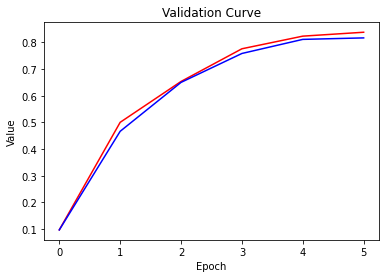

In [ ]:
plt.plot(ActualData, 'red')
plt.plot(PredictionData, 'blue')
plt.title('Validation Curve')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

##Confusion Matrix

To change the multi-class from "y_test", and convert to int for confusion matrix

In [ ]:
feature = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_test = y_test.dot(feature).astype(int)

**Visualize the confusion matrix**

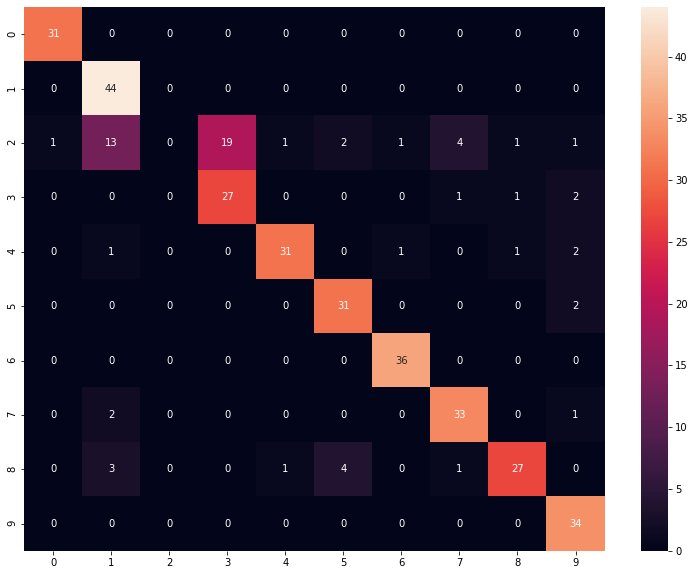

In [ ]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(confusionMatrix, range(10), range(10))
plt.figure(figsize=(13,10))
sn.heatmap(df_cm, annot=True)
plt.show()